In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import EMNIST
from torchvision import transforms

In [2]:
class CNN_EMnist(nn.Module):
    def __init__(self, input_channel):
        super(CNN_EMnist, self).__init__()

        self.dw1 = nn.Sequential(
            nn.Conv2d(input_channel, 32, kernel_size=5),
            nn.ReLU(),
        )

        self.dw2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(),            
        )

        self.up1 = nn.Sequential(
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=5) 
        )

        self.up2 = nn.Sequential(            
            nn.ReLU(),
            nn.ConvTranspose2d(32, input_channel, kernel_size=5) 
        )

        self.act = nn.Sigmoid()


    def forward(self, x):
        x = self.dw1(x)
        x= self.dw2(x)
        x = self.up1(x)
        x = self.up2(x)
        x = self.act(x)
        return x

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(), 
        transforms.Normalize((0.1307,), (0.3081,))
    ]
)

trainset = EMNIST(root='~/data', split = "letters", train=True, download=True, transform=transform)
train_dl = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testset = EMNIST(root='~/data', split = "letters", train=False, download=True, transform=transform)
test_dl = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

print(len(train_dl), len(test_dl))

3900 650


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu", index = 0)

model = CNN_EMnist(input_channel=1).to(device)

optimizer = Adam(model.parameters(), lr = 0.0001)

loss_fn = nn.MSELoss()

In [5]:
for epoch in range(10):
    model.train()
    tr_total_loss = 0
    for train_img, _ in tqdm(train_dl):
        train_img = train_img.to(device)

        gen_img = model(train_img)
        train_loss = loss_fn(gen_img, train_img)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        tr_total_loss += train_loss.item()

    model.eval()
    with torch.no_grad():
        va_total_loss = 0
        for valid_img, _ in tqdm(test_dl):
            valid_img = valid_img.to(device)

            gen_img = model(valid_img)

            valid_loss = loss_fn(gen_img, valid_img)

            va_total_loss += valid_loss.item()

    print(f"Epoch: {epoch} - TrainLoss: {tr_total_loss/len(train_dl)} - ValidLoss: {va_total_loss/len(test_dl)}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:06<00:00, 106.32it/s]


Epoch: 0 - TrainLoss: 0.5055089614024529 - ValidLoss: 0.4978306040397057


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 110.21it/s]


Epoch: 1 - TrainLoss: 0.4977412329041041 - ValidLoss: 0.4973979409841391


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 114.22it/s]


Epoch: 2 - TrainLoss: 0.49749964707172833 - ValidLoss: 0.4972735493916732


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 109.61it/s]


Epoch: 3 - TrainLoss: 0.49735163256908077 - ValidLoss: 0.4971102799819066


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 114.10it/s]


Epoch: 4 - TrainLoss: 0.49722288590211133 - ValidLoss: 0.49703622868427866


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 109.51it/s]


Epoch: 5 - TrainLoss: 0.49715800144733524 - ValidLoss: 0.4970964661469826


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 113.29it/s]


Epoch: 6 - TrainLoss: 0.4971219781499643 - ValidLoss: 0.4969358035234305


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 113.98it/s]


Epoch: 7 - TrainLoss: 0.49710028161605196 - ValidLoss: 0.4969206605507777


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 114.18it/s]


Epoch: 8 - TrainLoss: 0.49708580824809195 - ValidLoss: 0.4969050863155952


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:05<00:00, 110.23it/s]

Epoch: 9 - TrainLoss: 0.4970753085842499 - ValidLoss: 0.4968958086233873


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.19it/s]


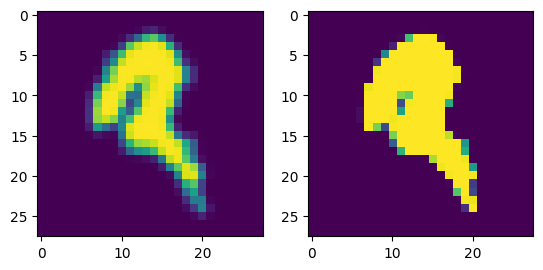

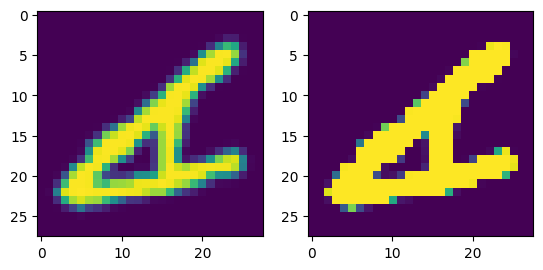

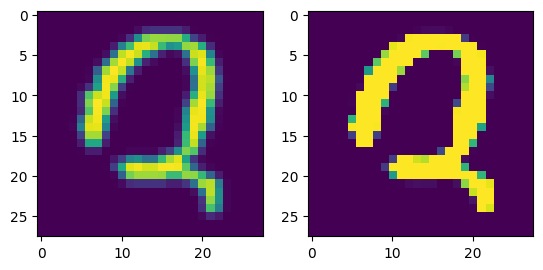

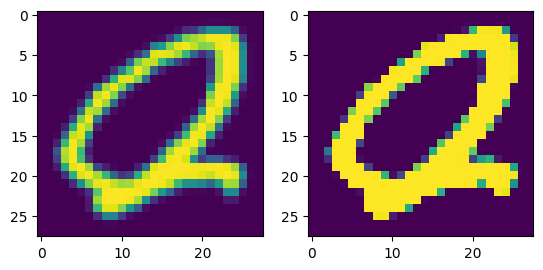

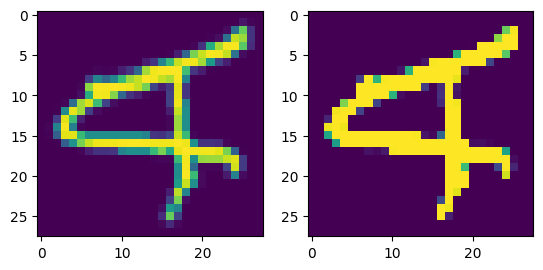

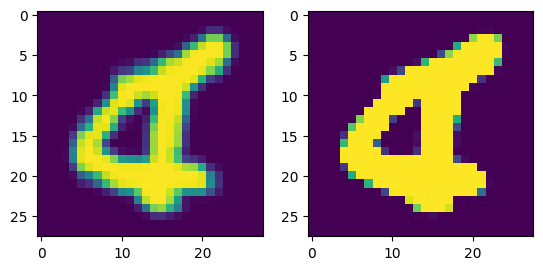

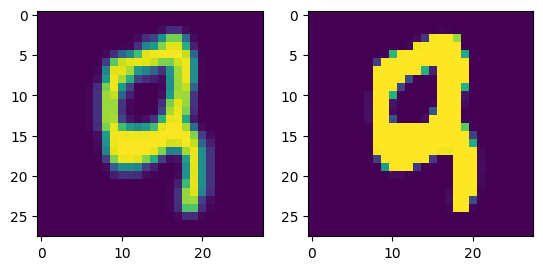

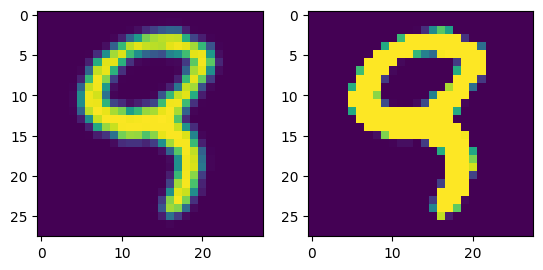

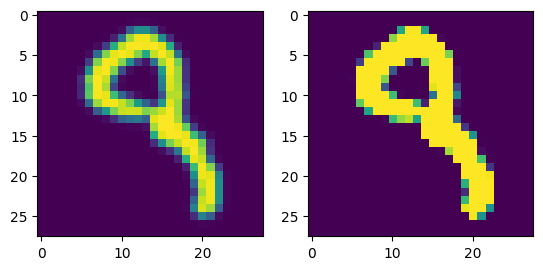

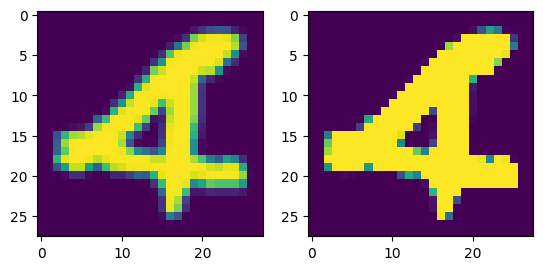

In [6]:
model.eval()
with torch.no_grad():
    for test_case_idx in tqdm(range(10)):
        valid_img, _ = testset[test_case_idx]
        valid_img = valid_img.unsqueeze(dim=0).to(device)

        gen_img = model(valid_img)        

        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(valid_img[0].cpu().permute(1, -1, 0).numpy())
        axarr[1].imshow(gen_img[0].cpu().permute(1, -1, 0).numpy())